rmckanry_ml.ipynb
Rex McKanry
https://github.com/rmckanry/datafun-07-ml


In [43]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


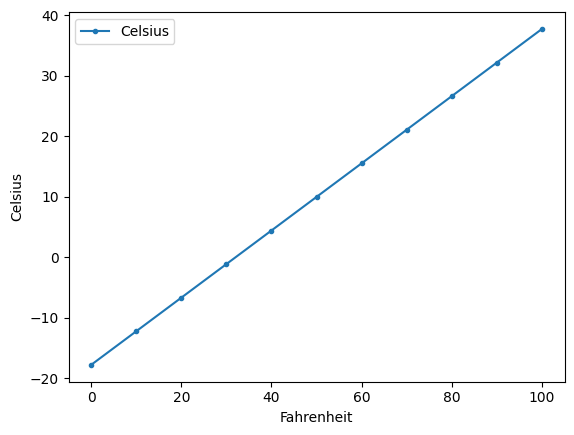

In [44]:
## Part 1 - Chart a Straight Line

c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


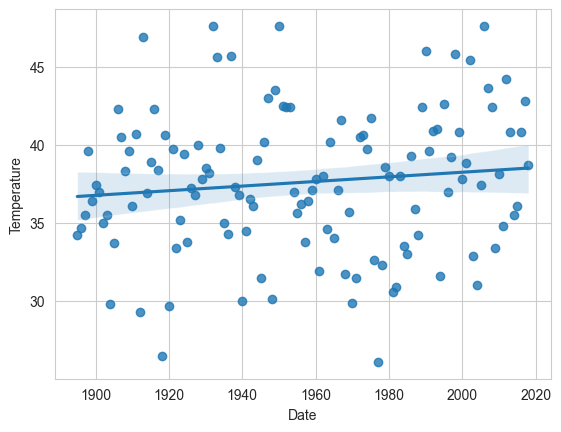

In [45]:
### Part 2 - Prediction

nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc_df.head()
nyc_df.tail()

nyc_df.columns = ['Date' ,'Temperature', 'Anomaly']
nyc_df.head(3)

nyc_df.Date.dtype
#dtype('int64')

nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope
linear_regression.intercept

linear_regression.slope * 2019 + linear_regression.intercept
linear_regression.slope * 1890 + linear_regression.intercept
linear_regression.slope * 2024 + linear_regression.intercept

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
